In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
infile = '../outputs/workingdir/ppo2_rudder/Sonic_policy_cnn/2018-06-23T22-17-35/baselines/log.txt'

In [3]:
import collections

def parse_log(infile):
    data = collections.defaultdict(list)
    with open(infile) as fo:
        for line in fo:
            line = line.strip()
            if '|' in line:
                s = line.strip('|').split('|')
                key, value = [ss.strip() for ss in s]
                value = float(value)
                data[key].append(value)

    df = pd.DataFrame(data) 
    return df

df = parse_log(infile)
df['hours_elapsed']=df['time_elapsed']/60/60
df['total_timesteps (M)']=df['total_timesteps']*1e-6
reward_scaling = 0.01
df['eprewmean100']/=reward_scaling
df['eprewmean']/=reward_scaling
df = df.set_index('total_timesteps (M)', drop=False)
df = df.sort_index()

df_time = df.set_index('hours_elapsed')
df_time = df_time.sort_index()

df.tail().T

total_timesteps (M),1.0350169999999999,1.037769,1.042953,1.045269,1.050879
Relative_emavg_error...,1.780000e+00,1.780000e+00,1.730000e+00,1.730000e+00,1.720000e+00
approxkl,2.913947e-02,3.906915e-02,6.017495e-02,2.091683e-02,8.628598e-02
clipfrac,6.319173e-01,5.853272e-01,6.669515e-01,5.609538e-01,7.303467e-01
emavg_approxkl,4.774805e-02,4.775909e-02,4.517566e-02,4.575576e-02,4.840226e-02
eplenmean,1.870000e+03,1.830000e+03,1.870000e+03,1.870000e+03,1.870000e+03
eplenmean100,1.820000e+03,1.780000e+03,1.830000e+03,1.860000e+03,1.840000e+03
eprewmean,2.520000e+03,2.460000e+03,2.460000e+03,2.430000e+03,2.490000e+03
eprewmean100,2.590000e+03,2.580000e+03,2.690000e+03,2.600000e+03,2.770000e+03
explained_variance,8.670000e-01,9.080000e-01,8.650000e-01,8.860000e-01,8.830000e-01
fps,1.090000e+02,5.500000e+01,1.600000e+01,6.500000e+01,1.240000e+02


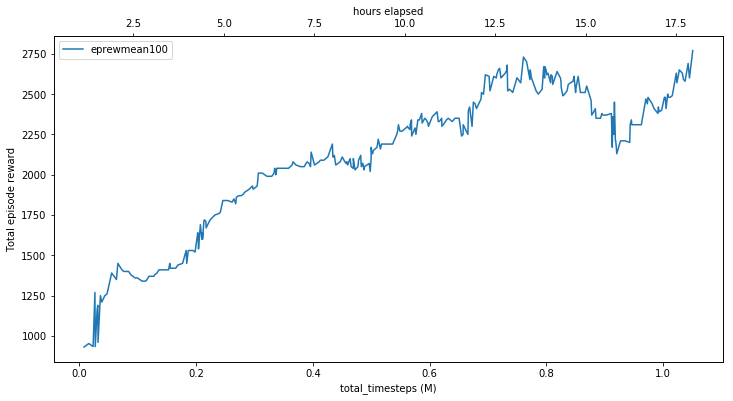

In [4]:
df[['eprewmean100']].plot(figsize=(12,6))
plt.ylabel('Total episode reward')

# Also plot hours on another x axis
def add_hours_topx(df):
    ax2 = plt.gca().twiny()
    hours = df['hours_elapsed']
    plt.xlim([hours.min(),hours.max()])
    plt.xlabel('hours elapsed')

add_hours_topx(df)
plt.show()

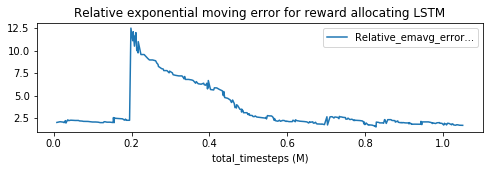

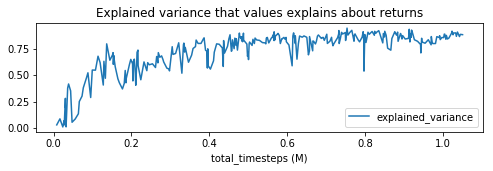

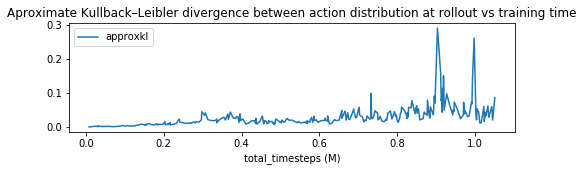

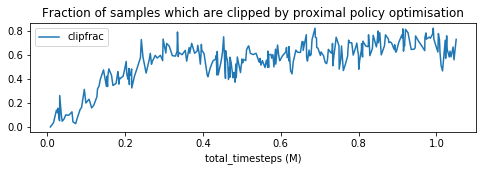

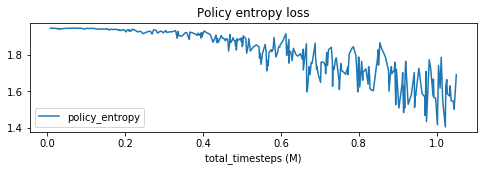

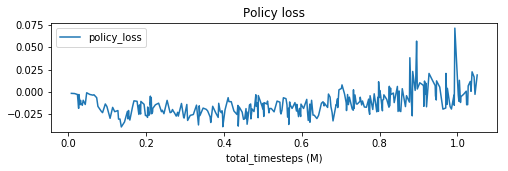

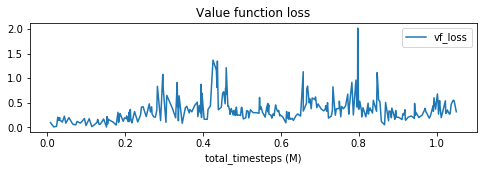

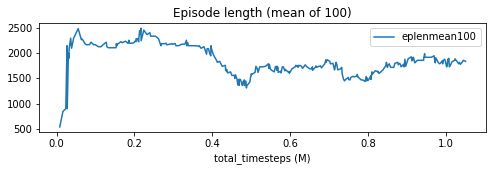

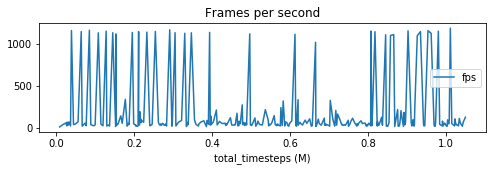

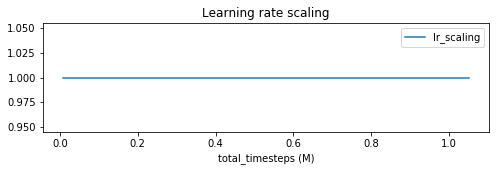

In [6]:
column_desc={
    'Relative_emavg_error...':'Relative exponential moving error for reward allocating LSTM',
    'explained_variance':'Explained variance that values explains about returns',
    'approxkl':'Aproximate Kullback–Leibler divergence between action distribution at rollout vs training time',
    'clipfrac':'Fraction of samples which are clipped by proximal policy optimisation',
    'vf_loss':'Value function loss',
    'policy_entropy':'Policy entropy loss',
    'policy_loss':'Policy loss',
    'eplenmean100':'Episode length (mean of 100)',
    'fps':'Frames per second',
    'lr_scaling':'Learning rate scaling'
    
}

for col in [
    'Relative_emavg_error...', # Relative_exponential moving_error_LSTM
    'explained_variance', # Explained variance in return values. Computes fraction of variance that ypred explains about y. (ypred=value, y=returns)
    
    # PPO diagnostics
    'approxkl', # kl between action distribution at rollout vs training time
#     'emavg_approxkl',
    'clipfrac', # fraction of samples which are clipped
    
    # PPO Losses
    'policy_entropy',
    'policy_loss',
    'vf_loss',
    
    # Env stats
    'eplenmean100',
    'fps',
    'lr_scaling',
    
#     'nupdates',
#     'game_num',
]:
    df[[col]].plot(figsize=(8, 2))
    if col in column_desc:
        plt.title(column_desc[col])
#     add_hours_topx(df)
    plt.show()

In [7]:
df['fps'].mean()

165.17821782178217